In [22]:
import pystan

In [1]:
!pip install arviz
import arviz

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [67]:
plt.style.use('ggplot')

In [6]:
df = pd.read_csv('/content/data.csv')

In [8]:
df

,data,parcent
0,1,69.00
1,2,68.58
2,3,68.69
3,4,68.47
4,5,68.39
5,6,67.99
6,7,67.64
7,8,67.63
8,9,67.67
9,10,67.71


<function matplotlib.pyplot.figure>

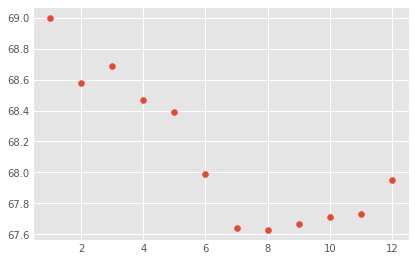

In [68]:
plt.scatter(x=df['data'],y=df['parcent'])
plt.figure

In [16]:
x = df.iloc[:, 0]
y = df.iloc[:, 1]

In [ ]:
x_pred = [i for i in range(13,51)]

In [37]:
x_pred = np.array(x_pred)

In [42]:
x_pred = pd.Series(x_pred)

In [48]:
y

0     69.00
1     68.58
2     68.69
3     68.47
4     68.39
5     67.99
6     67.64
7     67.63
8     67.67
9     67.71
10    67.73
11    67.95
Name: parcent, dtype: float64

In [38]:
print(f'{x.shape}')
print(f'{y.shape}')
print(f'{x_pred.shape}')

(12,)
(12,)
(38,)


In [30]:
sm = pystan.StanModel(file = '/content/reg2.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_5abc5da9cf168d5bd404c88aac249f5d NOW.


In [49]:
fit = sm.sampling(
    data = dict(
        N = n,
        x = x,
        y = y,
        N_pred = len(x_pred),
        x_pred = x_pred
        ),
    seed = 1234,
    iter = 5000,
    warmup = 1000,
    chains = 4)

Inference for Stan model: anon_model_5abc5da9cf168d5bd404c88aac249f5d.
4 chains, each with iter=5000; warmup=1000; thin=1; 
post-warmup draws per chain=4000, total post-warmup draws=16000.

              mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
beta_0       68.86  2.6e-3   0.19  68.47  68.75  68.86  68.98  69.24   5556    1.0
beta_1       -0.11  3.4e-4   0.03  -0.17  -0.13  -0.11   -0.1  -0.06   5645    1.0
sigma          0.3  1.1e-3   0.08   0.19   0.24   0.28   0.34    0.5   5884    1.0
mu_pred[1]   67.38  2.1e-3   0.19   67.0  67.26  67.38  67.49  67.76   8076    1.0
mu_pred[2]   67.27  2.4e-3   0.21  66.84  67.13  67.26   67.4   67.7   7621    1.0
mu_pred[3]   67.15  2.8e-3   0.24  66.68   67.0  67.15   67.3  67.63   7297    1.0
mu_pred[4]   67.04  3.1e-3   0.26  66.52  66.87  67.04   67.2  67.57   7056    1.0
mu_pred[5]   66.92  3.4e-3   0.29  66.35  66.74  66.92   67.1  67.51   6872    1.0
mu_pred[6]   66.81  3.8e-3   0.31  66.19  66.61  66.81   67.0  

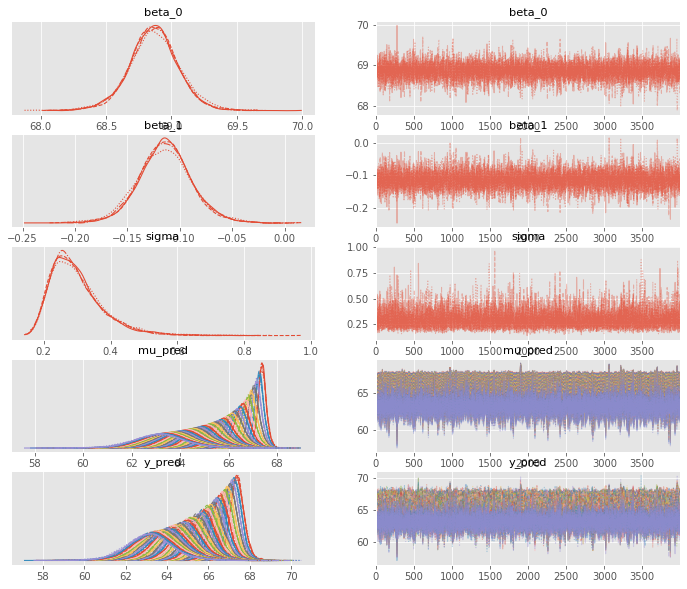

In [50]:
arviz.plot_trace(fit)
print(fit)

In [ ]:
temp = [i for i in range(0,51)]
temp

In [59]:
temp2 = []
for i in range(0,51):
  a = 68.86 + (-0.11 * temp[i])
  temp2.append(a)

In [60]:
temp2

[68.86,
 68.75,
 68.64,
 68.53,
 68.42,
 68.31,
 68.2,
 68.09,
 67.98,
 67.87,
 67.76,
 67.65,
 67.54,
 67.42999999999999,
 67.32,
 67.21,
 67.1,
 66.99,
 66.88,
 66.77,
 66.66,
 66.55,
 66.44,
 66.33,
 66.22,
 66.11,
 66.0,
 65.89,
 65.78,
 65.67,
 65.56,
 65.45,
 65.34,
 65.23,
 65.12,
 65.01,
 64.9,
 64.78999999999999,
 64.68,
 64.57,
 64.46,
 64.35,
 64.24,
 64.13,
 64.02,
 63.91,
 63.8,
 63.69,
 63.58,
 63.47,
 63.36]

<function matplotlib.pyplot.figure>

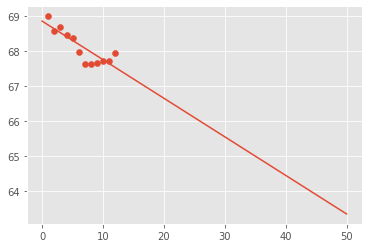

In [64]:
plt.scatter(x=df['data'],y=df['parcent'])
plt.plot(temp,temp2)
plt.figure

Text(0, 0.5, 'percent')

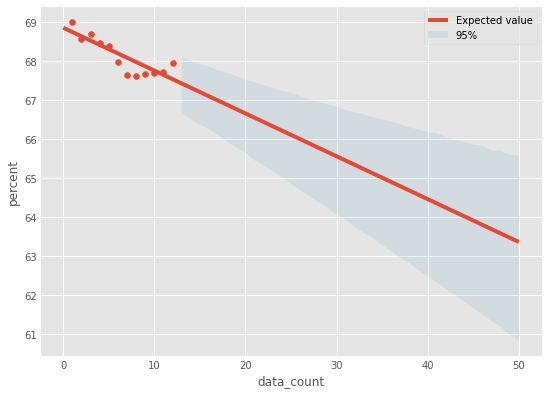

In [74]:
reg_95 = np.quantile(fit['y_pred'],axis=0,q=[0.025,0.975]) #事後予測分布
fig,axes = plt.subplots(figsize=(8,6))
axes.scatter(x=df['data'],y=df['parcent'])
axes.plot(temp,temp2,label='Expected value')
axes.fill_between(x_pred,reg_95[0],reg_95[1],alpha=0.1,label='95%')
axes.legend(loc='best')
axes.set_xlabel('data_count')
axes.set_ylabel('percent')